In [6]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

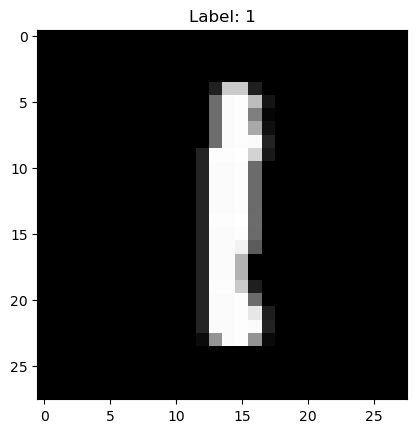

In [7]:
# Device configuration
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')


# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# Data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

# Visualize a sample
images, labels = next(iter(train_loader))
plt.imshow(images[0].numpy().squeeze(), cmap='gray')
plt.title(f'Label: {labels[0].item()}')
plt.show()

In [8]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Hyperparameters
input_size = 784  # 28x28 pixels
hidden_size = 10
num_classes = 10
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [10]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 200 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}], Loss: {loss.item():.4f}')

Epoch [1/5], Step [200], Loss: 0.3408
Epoch [1/5], Step [400], Loss: 0.3660
Epoch [1/5], Step [600], Loss: 0.3409
Epoch [2/5], Step [200], Loss: 0.3004
Epoch [2/5], Step [400], Loss: 0.4254
Epoch [2/5], Step [600], Loss: 0.4051
Epoch [3/5], Step [200], Loss: 0.2785
Epoch [3/5], Step [400], Loss: 0.2915
Epoch [3/5], Step [600], Loss: 0.3304
Epoch [4/5], Step [200], Loss: 0.4405
Epoch [4/5], Step [400], Loss: 0.4152
Epoch [4/5], Step [600], Loss: 0.2936
Epoch [5/5], Step [200], Loss: 0.3372
Epoch [5/5], Step [400], Loss: 0.2680
Epoch [5/5], Step [600], Loss: 0.3030


In [11]:
# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy: {100 * correct / total}%')

Accuracy: 90.86%
